=== SVM Kernels Comparison on Iris Dataset ===

1. Loading Iris Dataset...
Dataset shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Class distribution: [50 50 50]

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

2. Data Visualization...


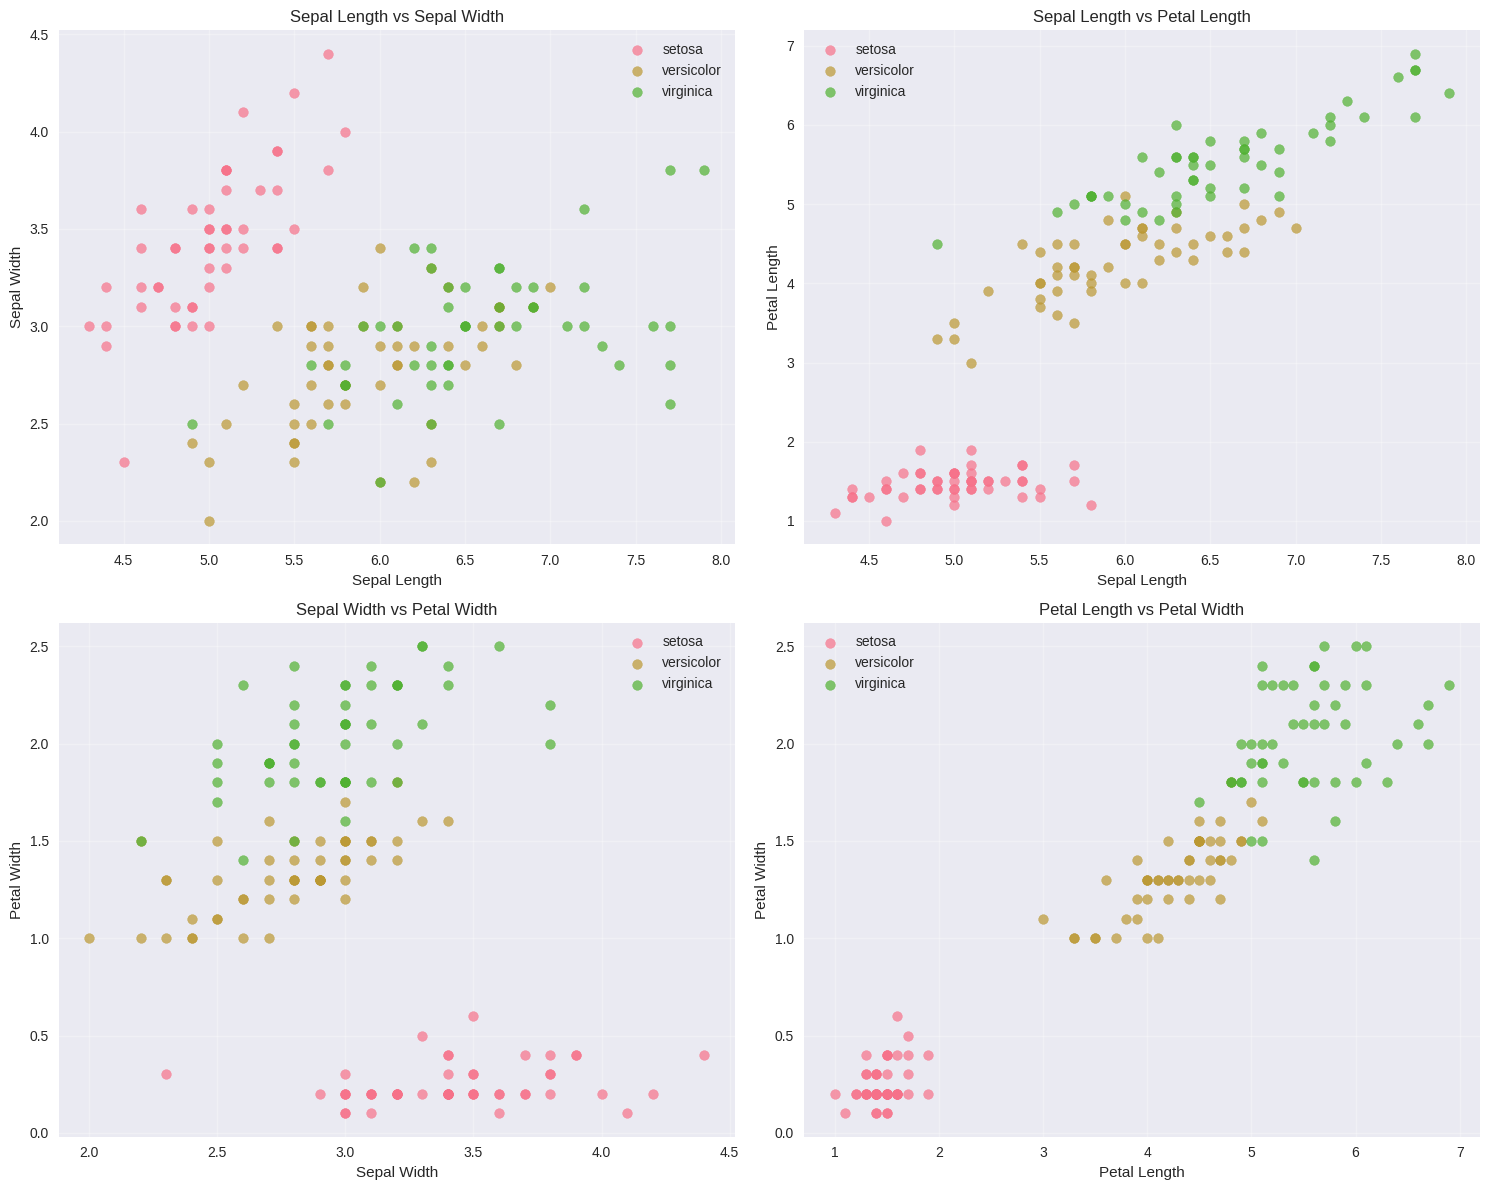

3. Data Preprocessing...
Training set size: 105
Test set size: 45

4. Training SVM with Different Kernels...

--- Linear Kernel ---
Accuracy: 0.9111
Number of support vectors: [ 2 10  9]
Total support vectors: 21

--- Polynomial Kernel ---
Accuracy: 0.8667
Number of support vectors: [ 3 20 16]
Total support vectors: 39

--- RBF Kernel ---
Accuracy: 0.9333
Number of support vectors: [ 6 18 16]
Total support vectors: 40

5. Detailed Performance Analysis...


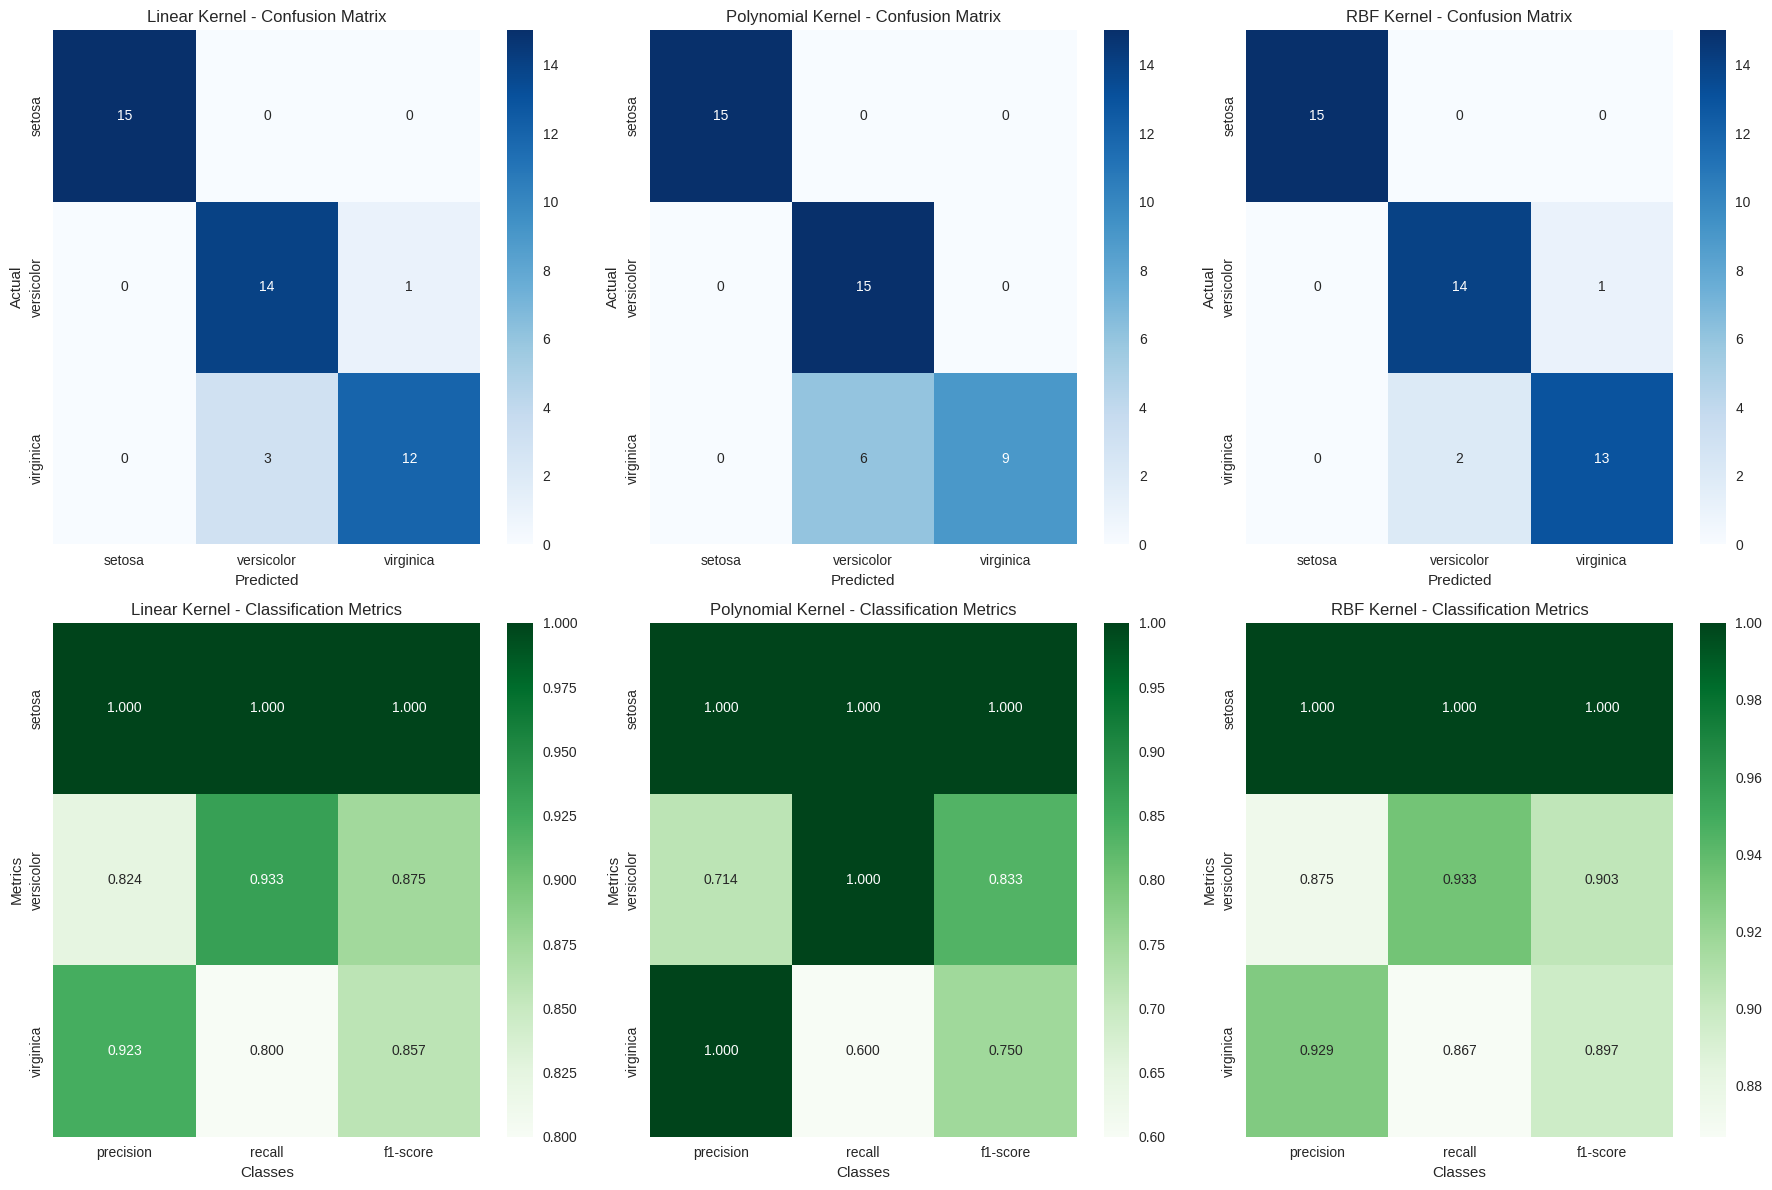


--- Linear Kernel Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45


--- Polynomial Kernel Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.71      1.00      0.83        15
   virginica       1.00      0.60      0.75        15

    accuracy                           0.87        45
   macro avg       0.90      0.87      0.86        45
weighted avg       0.90      0.87      0.86        45


--- RBF Kernel Classification Report ---
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00    

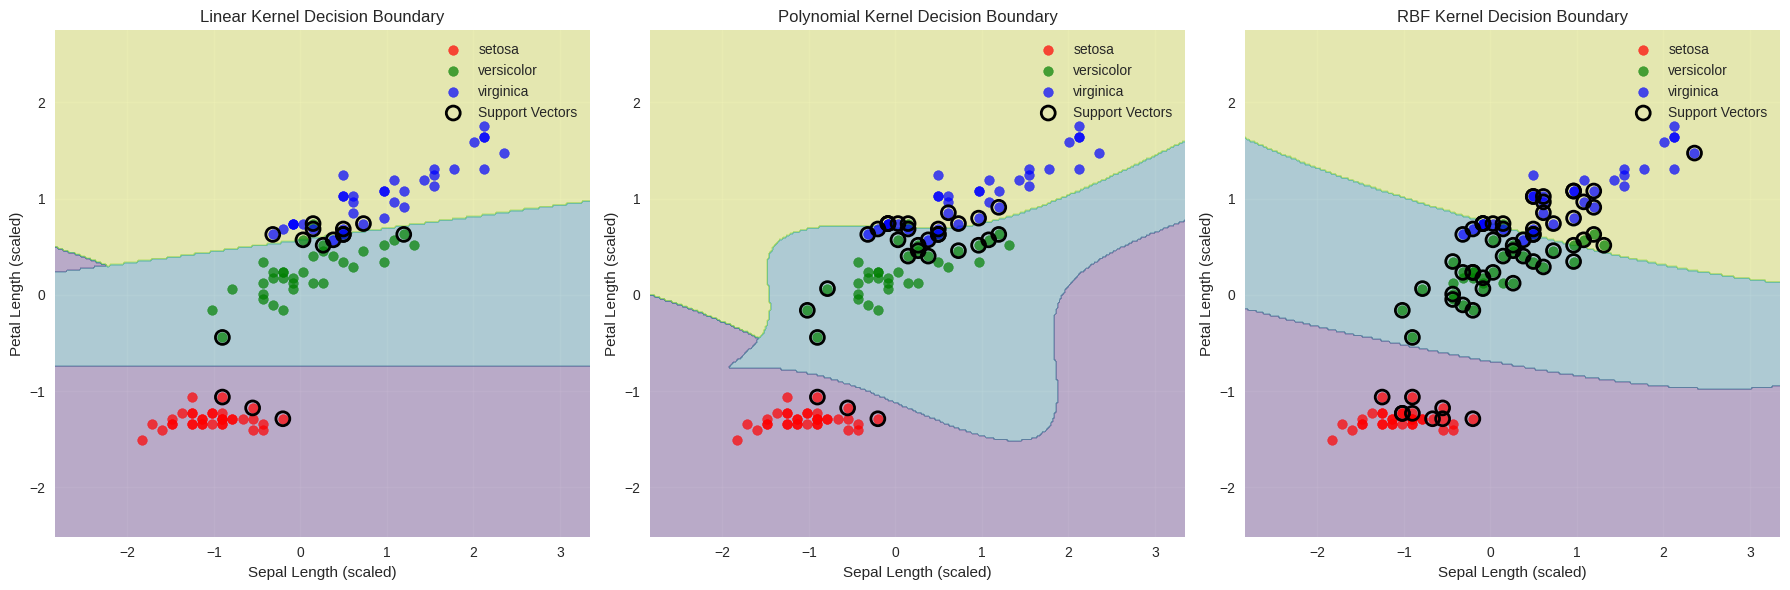


8. Summary and Comparison...

=== RESULTS SUMMARY ===
Kernel       Accuracy   Support Vectors    Best CV Score  
------------------------------------------------------------
Linear       0.9111     21                 0.9810         
Polynomial   0.8667     39                 0.9714         
RBF          0.9333     40                 0.9810         


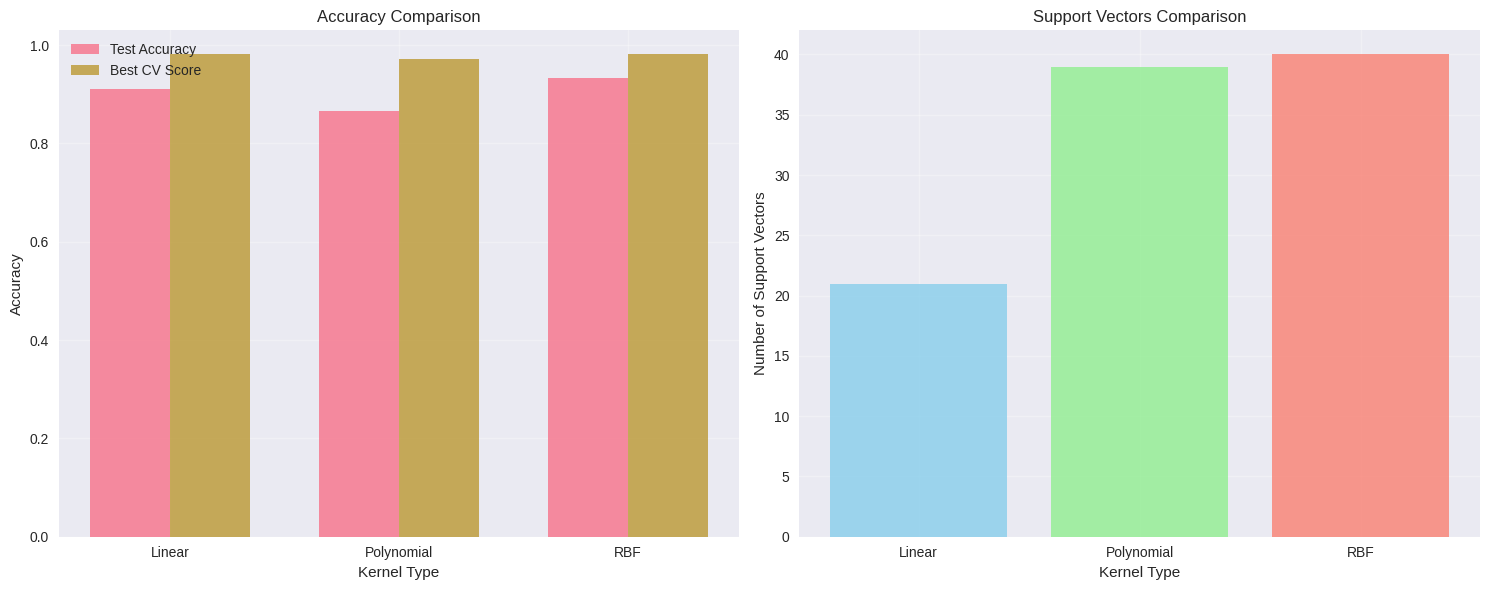


9. Key Insights and Recommendations...

=== KEY INSIGHTS ===
1. KERNEL CHARACTERISTICS:
   • Linear: Simple, fast, good for linearly separable data
   • Polynomial: Can capture non-linear relationships, sensitive to degree
   • RBF: Most flexible, good for complex non-linear patterns

2. PERFORMANCE ON IRIS DATASET:
   • Best performing kernel: RBF
   • All kernels perform well on Iris (relatively simple dataset)
   • RBF typically requires more support vectors (more complex decision boundary)

3. RECOMMENDATIONS:
   • For simple datasets: Start with Linear kernel
   • For moderate complexity: Try Polynomial kernel (degree 2-4)
   • For complex patterns: Use RBF kernel
   • Always perform hyperparameter tuning for optimal results
   • Consider computational cost vs. accuracy trade-offs

=== ANALYSIS COMPLETE ===
This notebook demonstrated the application of Linear, Polynomial, and RBF kernels
on the Iris dataset, including visualization, hyperparameter tuning, and performance comparis

In [1]:
# Linear, Polynomial, and RBF Kernels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=== SVM Kernels Comparison on Iris Dataset ===\n")

# 1. Load and Explore the Iris Dataset
print("1. Loading Iris Dataset...")
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f"Dataset shape: {X.shape}")
print(f"Features: {feature_names}")
print(f"Target classes: {target_names}")
print(f"Class distribution: {np.bincount(y)}\n")

# Create DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = [target_names[i] for i in y]

print("First 5 rows of the dataset:")
print(df.head())
print()

# 2. Data Visualization
print("2. Data Visualization...")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Pairwise scatter plots
features_pairs = [(0, 1), (0, 2), (1, 3), (2, 3)]
pair_names = [
    ('Sepal Length', 'Sepal Width'),
    ('Sepal Length', 'Petal Length'),
    ('Sepal Width', 'Petal Width'),
    ('Petal Length', 'Petal Width')
]

for i, ((f1, f2), (name1, name2)) in enumerate(zip(features_pairs, pair_names)):
    ax = axes[i//2, i%2]
    for j, species in enumerate(target_names):
        mask = y == j
        ax.scatter(X[mask, f1], X[mask, f2], label=species, alpha=0.7)
    ax.set_xlabel(name1)
    ax.set_ylabel(name2)
    ax.set_title(f'{name1} vs {name2}')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Data Preprocessing
print("3. Data Preprocessing...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train_scaled.shape[0]}")
print(f"Test set size: {X_test_scaled.shape[0]}\n")

# 4. SVM with Different Kernels
print("4. Training SVM with Different Kernels...")

# Define kernels to test
kernels = {
    'Linear': 'linear',
    'Polynomial': 'poly',
    'RBF': 'rbf'
}

# Store results
results = {}
models = {}

for kernel_name, kernel_type in kernels.items():
    print(f"\n--- {kernel_name} Kernel ---")

    # Create and train model
    if kernel_type == 'poly':
        # For polynomial kernel, we can specify degree
        svm_model = SVC(kernel=kernel_type, degree=3, random_state=42)
    else:
        svm_model = SVC(kernel=kernel_type, random_state=42)

    # Train the model
    svm_model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results[kernel_name] = {
        'model': svm_model,
        'predictions': y_pred,
        'accuracy': accuracy
    }
    models[kernel_name] = svm_model

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Number of support vectors: {svm_model.n_support_}")
    print(f"Total support vectors: {len(svm_model.support_)}")

# 5. Detailed Performance Analysis
print("\n5. Detailed Performance Analysis...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

for i, (kernel_name, result) in enumerate(results.items()):
    # Confusion Matrix
    ax_cm = axes[0, i]
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names, ax=ax_cm)
    ax_cm.set_title(f'{kernel_name} Kernel - Confusion Matrix')
    ax_cm.set_xlabel('Predicted')
    ax_cm.set_ylabel('Actual')

    # Classification Report (as text)
    ax_report = axes[1, i]
    report = classification_report(y_test, result['predictions'],
                                 target_names=target_names, output_dict=True)

    # Create a heatmap for precision, recall, f1-score
    metrics_df = pd.DataFrame(report).iloc[:-1, :3].T  # Exclude 'support' and summary rows
    sns.heatmap(metrics_df, annot=True, fmt='.3f', cmap='Greens', ax=ax_report)
    ax_report.set_title(f'{kernel_name} Kernel - Classification Metrics')
    ax_report.set_xlabel('Classes')
    ax_report.set_ylabel('Metrics')

plt.tight_layout()
plt.show()

# Print detailed classification reports
for kernel_name, result in results.items():
    print(f"\n--- {kernel_name} Kernel Classification Report ---")
    print(classification_report(y_test, result['predictions'], target_names=target_names))

# 6. Hyperparameter Tuning
print("\n6. Hyperparameter Tuning with Grid Search...")

# Define parameter grids for each kernel
param_grids = {
    'Linear': {'C': [0.1, 1, 10, 100]},
    'Polynomial': {'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']},
    'RBF': {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]}
}

best_models = {}
best_scores = {}

for kernel_name, kernel_type in kernels.items():
    print(f"\nTuning {kernel_name} kernel...")

    # Create base model
    svm = SVC(kernel=kernel_type, random_state=42)

    # Grid search
    grid_search = GridSearchCV(svm, param_grids[kernel_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)

    # Store best model
    best_models[kernel_name] = grid_search.best_estimator_
    best_scores[kernel_name] = grid_search.best_score_

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

    # Test on test set
    test_accuracy = grid_search.best_estimator_.score(X_test_scaled, y_test)
    print(f"Test accuracy: {test_accuracy:.4f}")

# 7. Decision Boundaries Visualization (2D)
print("\n7. Visualizing Decision Boundaries...")

# Use only two features for 2D visualization
X_2d = X[:, [0, 2]]  # Sepal length and Petal length
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.3, random_state=42, stratify=y)

# Scale the 2D data
scaler_2d = StandardScaler()
X_train_2d_scaled = scaler_2d.fit_transform(X_train_2d)
X_test_2d_scaled = scaler_2d.transform(X_test_2d)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (kernel_name, kernel_type) in enumerate(kernels.items()):
    # Train model on 2D data
    if kernel_name in best_models:
        # Use best hyperparameters but retrain on 2D data
        best_params = best_models[kernel_name].get_params()
        svm_2d = SVC(kernel=kernel_type, **{k: v for k, v in best_params.items()
                                          if k in ['C', 'degree', 'gamma']}, random_state=42)
    else:
        svm_2d = SVC(kernel=kernel_type, random_state=42)

    svm_2d.fit(X_train_2d_scaled, y_train_2d)

    # Create mesh for decision boundary
    h = 0.02
    x_min, x_max = X_train_2d_scaled[:, 0].min() - 1, X_train_2d_scaled[:, 0].max() + 1
    y_min, y_max = X_train_2d_scaled[:, 1].min() - 1, X_train_2d_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh
    Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    ax = axes[i]
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

    # Plot training points
    colors = ['red', 'green', 'blue']
    for j, species in enumerate(target_names):
        mask = y_train_2d == j
        ax.scatter(X_train_2d_scaled[mask, 0], X_train_2d_scaled[mask, 1],
                  c=colors[j], label=species, alpha=0.7)

    # Plot support vectors
    ax.scatter(svm_2d.support_vectors_[:, 0], svm_2d.support_vectors_[:, 1],
              s=100, facecolors='none', edgecolors='black', linewidth=2, label='Support Vectors')

    ax.set_xlabel('Sepal Length (scaled)')
    ax.set_ylabel('Petal Length (scaled)')
    ax.set_title(f'{kernel_name} Kernel Decision Boundary')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 8. Summary and Comparison
print("\n8. Summary and Comparison...")

print("\n=== RESULTS SUMMARY ===")
print(f"{'Kernel':<12} {'Accuracy':<10} {'Support Vectors':<18} {'Best CV Score':<15}")
print("-" * 60)

for kernel_name in kernels.keys():
    original_acc = results[kernel_name]['accuracy']
    n_sv = len(results[kernel_name]['model'].support_)
    best_cv_score = best_scores.get(kernel_name, 'N/A')

    if isinstance(best_cv_score, float):
        best_cv_str = f"{best_cv_score:.4f}"
    else:
        best_cv_str = str(best_cv_score)

    print(f"{kernel_name:<12} {original_acc:<10.4f} {n_sv:<18} {best_cv_str:<15}")

# Performance comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy comparison
kernel_names = list(results.keys())
accuracies = [results[k]['accuracy'] for k in kernel_names]
cv_scores = [best_scores[k] if k in best_scores else 0 for k in kernel_names]

x = np.arange(len(kernel_names))
width = 0.35

ax1.bar(x - width/2, accuracies, width, label='Test Accuracy', alpha=0.8)
ax1.bar(x + width/2, cv_scores, width, label='Best CV Score', alpha=0.8)
ax1.set_xlabel('Kernel Type')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(kernel_names)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Support vectors comparison
support_vectors = [len(results[k]['model'].support_) for k in kernel_names]
ax2.bar(kernel_names, support_vectors, alpha=0.8, color=['skyblue', 'lightgreen', 'salmon'])
ax2.set_xlabel('Kernel Type')
ax2.set_ylabel('Number of Support Vectors')
ax2.set_title('Support Vectors Comparison')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. Key Insights
print("\n9. Key Insights and Recommendations...")
print("\n=== KEY INSIGHTS ===")
print("1. KERNEL CHARACTERISTICS:")
print("   • Linear: Simple, fast, good for linearly separable data")
print("   • Polynomial: Can capture non-linear relationships, sensitive to degree")
print("   • RBF: Most flexible, good for complex non-linear patterns")

print("\n2. PERFORMANCE ON IRIS DATASET:")
best_kernel = max(results.keys(), key=lambda k: results[k]['accuracy'])
print(f"   • Best performing kernel: {best_kernel}")
print(f"   • All kernels perform well on Iris (relatively simple dataset)")
print(f"   • RBF typically requires more support vectors (more complex decision boundary)")

print("\n3. RECOMMENDATIONS:")
print("   • For simple datasets: Start with Linear kernel")
print("   • For moderate complexity: Try Polynomial kernel (degree 2-4)")
print("   • For complex patterns: Use RBF kernel")
print("   • Always perform hyperparameter tuning for optimal results")
print("   • Consider computational cost vs. accuracy trade-offs")

print("\n=== ANALYSIS COMPLETE ===")
print("This notebook demonstrated the application of Linear, Polynomial, and RBF kernels")
print("on the Iris dataset, including visualization, hyperparameter tuning, and performance comparison.")